<font style='font-size:1.5em'>DS105L – Data for Data Science</font>

<font style='font-size:1.2em'>**✍️ Project Work, web scrapping top rotten tomatoes information from wikipedia & rotten tomatoes**</font>

----

# Setup



# Import libraries

In [1]:
# Add your code here
import requests

import pandas as pd

from bs4 import BeautifulSoup

import numpy as np

# Let's go!

In [2]:
# Add your web scraping code here
url_general_page = 'https://en.m.wikipedia.org/wiki/List_of_films_with_a_100%25_rating_on_Rotten_Tomatoes'
response = requests.get(url_general_page)
soup = BeautifulSoup(response.text)
# Find all links in the page
td = soup.find_all('td')

In [3]:
list_td = list(td)

# make ever 4th element in the list a new list, then convert them to a string and then splice the string to get the movie name
data = [str(list_td[i:i+4]) for i in range(0, len(list_td), 4)]
## side note: understand how the above code works another time

data[0]

'[<td><i><span data-sort-value="Golem: How He Came into the World\xa0!"><a href="/wiki/The_Golem:_How_He_Came_into_the_World" title="The Golem: How He Came into the World">The Golem: How He Came into the World</a></span></i>\n</td>, <td>1920\n</td>, <td>32\n</td>, <td><sup class="reference" id="cite_ref-11"><a href="#cite_note-11">[11]</a></sup></td>]'

In [4]:
# get movie name, movie year, cite note link and number of reviews from all movies

title_list = []
year_list = []
number_of_reviews_list = []
rotten_tomatoes_link_list = []
wiki_link_list = []
indiv_number_of_ratings_by_users_list = []
indiv_number_of_reviews_by_rotten_tomatoes_list = []
indiv_user_rating_list = []
indiv_genre_list = []
director_names_list = []
producers_list = []
writers_list = []
runtime_list = []


temp_var = 1752
for indiv in reversed(data):

    url_general_page = 'https://en.m.wikipedia.org/wiki/List_of_films_with_a_100%25_rating_on_Rotten_Tomatoes'
    response = requests.get(url_general_page)
    soup = BeautifulSoup(response.text)
    indiv_name = indiv.split('title="')[1].split('"')[0]
    indiv_year = indiv.split('</i>\n</td>, <td>')[1].split('\n</td>')[0]
    indiv_number_of_reviews = indiv.split('</i>\n</td>, <td>')[1].split('\n</td>, <td>')[1].split('\n</td>')[0]
    

    wiki_link = 'https://en.m.wikipedia.org' + soup.find_all('td')[temp_var].find('a')['href']
    if 'redlink' in wiki_link:
        wiki_link = None
    temp_var -= 4
    
    if temp_var == 0:
        break

    # finding the rotten tomatoes link
    indiv_note_link = 'cite_note-' + indiv.split('cite_note-')[1].split('"')[0]
    indiv_ref = str(soup.find(id= indiv_note_link))
    indiv_rotten_tomatoes_link = indiv_ref.split('text" href="')[1].split('"')[0]

    rotten_tomatoes_link = indiv_rotten_tomatoes_link
    request = requests.get(rotten_tomatoes_link)
    soup = BeautifulSoup(request.text)
    score_stats = str(soup.find_all('score-board'))

    try:
        indiv_user_rating = score_stats.split('audiencescore="')[1].split('"')[0] + '%'
    except IndexError:
        indiv_user_rating = None
        continue

    if indiv_user_rating == '%':
        indiv_user_rating = None

    indiv_number_of_reviews_by_rotten_tomatoes = score_stats.split('critics-count">\n')[1].split('\n')[0]
    indiv_number_of_reviews_by_rotten_tomatoes = indiv_number_of_reviews_by_rotten_tomatoes.strip()

    indiv_number_of_ratings_by_users = score_stats.split('audience-count">\n')[1].split('</a')[0]
    indiv_number_of_ratings_by_users = indiv_number_of_ratings_by_users.strip()

    # now for each indiv, we want to go to the rotten tomatoes link and get the synopsis, the user rating, number of reviews by rotten tomatoes, number of ratings by users, 
    # the genre, director, producer, writer, and runtime

    try:
        indiv_genre = str(soup.find_all('li', class_='info-item')).split('genre"="')[1].split('">\n')[1].split('\n')[1].strip()
    except IndexError:
        continue
    
    x = (soup.find_all('li', class_='info-item'))


    director_names = []
    for item in x:
        label = item.find('b', class_='info-item-label')
        if label and label.text.strip() == 'Director:':
            director_links = item.find_all('a', href=True, attrs={'data-qa': 'movie-info-director'})
            for link in director_links:
                director_names.append(link.text)



    producers = []
    producer_spans = soup.find_all('span', class_='info-item-value')
    for span in producer_spans:
        if 'Producer' in span.previous_sibling.previous_sibling.text:
          producer_links = span.find_all('a')
          for link in producer_links:
              producers.append(link.text)

    writers = []
    for item in x:
        label = item.find('b', class_='info-item-label')
        if label and label.text.strip() == 'Writer:':
            values = item.find_all('a')
            for v in values:
                writers.append(v.text)

    runtime = ''
    x = soup.find_all('li', {'class': 'info-item'})
    for item in x:
        label = item.find('b', {'class': 'info-item-label'})
        if label is not None and label.text.strip() == 'Runtime:':
            runtime = item.find('time').text.strip()
            break

###### study the above code and understand it better later

    title_list.append(indiv_name)
    year_list.append(indiv_year)
    number_of_reviews_list.append(indiv_number_of_reviews)
    rotten_tomatoes_link_list.append(indiv_rotten_tomatoes_link)
    wiki_link_list.append(wiki_link)
    indiv_number_of_ratings_by_users_list.append(indiv_number_of_ratings_by_users)
    indiv_number_of_reviews_by_rotten_tomatoes_list.append(indiv_number_of_reviews_by_rotten_tomatoes)
    indiv_user_rating_list.append(indiv_user_rating)
    indiv_genre_list.append(indiv_genre)
    director_names_list.append(director_names)
    producers_list.append(producers)
    writers_list.append(writers)
    runtime_list.append(runtime)
    
    #print (indiv_name)
    #print (indiv_year)
    #print (indiv_number_of_reviews)
    #print (indiv_rotten_tomatoes_link)
    #print (wiki_link)

    #print (indiv_synopsis)
    #print (indiv_user_rating)
    #print (indiv_number_of_ratings_by_users)
    #print (indiv_number_of_reviews_by_rotten_tomatoes)
    #print (indiv_genre)
    #print (director_names)
    #print (producers)  
    #print (writers)
    #print (runtime)

    #print ('-----------------')

    #make a df with all the lists

    df = pd.DataFrame({'title': title_list, 'year': year_list, 'number_of_reviews': number_of_reviews_list, 'rotten_tomatoes_link': rotten_tomatoes_link_list, 'wiki_link': wiki_link_list, 'number_of_ratings_by_users': indiv_number_of_ratings_by_users_list, 'number_of_reviews_by_rotten_tomatoes': indiv_number_of_reviews_by_rotten_tomatoes_list, 'user_rating': indiv_user_rating_list, 'genre': indiv_genre_list, 'director': director_names_list, 'producer': producers_list, 'writer': writers_list, 'runtime': runtime_list})
    df_main = df




In [5]:
import re  
list_of_revenue = []
revenue = None
for row in df['wiki_link']:
    
    rotten_tomatoes_link = row

    if row != None:
        request = requests.get(rotten_tomatoes_link)
        soup = BeautifulSoup(request.text)
        temp_var = (soup.find_all('tr'))
        for row in temp_var:
            label = row.find('th', {'class': 'infobox-label'})
            if label and label.text.strip() == 'Box office':
                revenue = row.find('td', {'class': 'infobox-data'}).text.strip()
    
    

        

    if revenue == None or row == None:
        list_of_revenue.append(None)
    else:
        list_of_revenue.append(revenue)

    #clean the list of revenue
    #remove everything in square brackets including square brackets from revenue
    lst = list_of_revenue

    cleaned_lst = []
    for item in lst:
        if item == None:
            cleaned_lst.append(item)
        else:
            cleaned_lst.append(re.sub(r'\[.*?\]', '', item))




In [6]:
#add a new column to the df called revenue and add the list to it
df['revenue'] = cleaned_lst

In [7]:
#remove the comma in the genre column
df['genre'] = df['genre'].str.replace(',', '')
df.sort_values(by='genre', inplace=True)

# the director column is a list now. If there are more than one directors, there will be more than one element in the list.
# if there is only one director, there will be only one element in the list
# if there is more than one director, i want to make each director a separate row
# if there is only one director, i want to keep it as it is



dfa = df.explode('director')
dfa.sort_values(by='director', inplace=True)

In [8]:
df

,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,runtime,revenue
154,The Age of Shadows,2016,49,https://www.rottentomatoes.com/m/the_age_of_sh...,https://en.m.wikipedia.org/wiki/Henri-Georges_...,"1,000+ Ratings",49 Reviews,83%,Action,[Kim Jee-woon],[Choi Jeong-hwa],[Kim Jee-woon],2h 20m,"$156,928"
178,SPL II: A Time for Consequences,2015,22,https://www.rottentomatoes.com/m/kill_zone_2_2016,https://en.m.wikipedia.org/wiki/Hukkle,500+ Ratings,22 Reviews,63%,Action,[Pou-Soi Cheang],"[Yip Wai Shun, Paco Wong]","[Lai-yin Leung, Ying Wong]",2h 0m,"$4,779"
388,Gentleman Jim (film),1942,25,https://www.rottentomatoes.com/m/gentleman_jim,https://en.m.wikipedia.org/wiki/Gentleman_Jim_...,500+ Ratings,25 Reviews,85%,Action,[Raoul Walsh],[Robert Buckner],"[Vincent Lawrence, Horace McCoy]",1h 44m,"$3,842,000$2 million (US rentals)1,255,311 adm..."
350,A Man Escaped,1956,40,https://www.rottentomatoes.com/m/man_escaped/,https://en.m.wikipedia.org/wiki/The_Kid_(1921_...,"5,000+ Ratings",40 Reviews,93%,Action,[Robert Bresson],"[Alain Poiré, Jean Thuillier]",[],1h 42m,"$5,450,000"
354,Seven Samurai,1954,93,https://www.rottentomatoes.com/m/seven_samurai...,https://en.m.wikipedia.org/wiki/Seven_Samurai,"50,000+ Ratings",95 Reviews,97%,Action,[Akira Kurosawa],[Sojiro Motoki],"[Shinobu Hashimoto, Akira Kurosawa, Hideo Oguni]",3h 28m,Japan rentals: ¥268.2 million ($2.3 million) ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,Winchester '73,1950,27,https://www.rottentomatoes.com/m/1023739_winch...,https://en.m.wikipedia.org/wiki/Winchester_%2773,"5,000+ Ratings",27 Reviews,86%,Western,[Anthony Mann],[Aaron Rosenberg],"[Borden Chase, Robert L. Richards]",1h 32m,"$2,250,000 (US rentals)"
326,The Shooting,1966,20,https://www.rottentomatoes.com/m/1018885-shooting,https://en.m.wikipedia.org/wiki/The_Adventures...,"1,000+ Ratings",20 Reviews,64%,Western,[Monte Hellman],"[Monte Hellman, Jack Nicholson]",[],1h 22m,"$3,981,000"
325,El Dorado (1966 film),1966,24,https://www.rottentomatoes.com/m/el_dorado/,https://en.m.wikipedia.org/wiki/Only_Angels_Ha...,"10,000+ Ratings",24 Reviews,87%,Western,[Howard Hawks],[Howard Hawks],[Leigh Brackett],2h 6m,$1 million
400,Stagecoach (1939 film),1939,46,https://www.rottentomatoes.com/m/1019774_stage...,https://en.m.wikipedia.org/wiki/Stagecoach_(19...,"10,000+ Ratings",47 Reviews,86%,Western,[John Ford],[John Ford],"[Ernest Haycox, Dudley Nichols, Ben Hecht]",1h 36m,"$1,103,757"


In [9]:
dfa

,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,runtime,revenue
0,A Thousand and One,2023,25,https://www.rottentomatoes.com/m/a_thousand_an...,None,0 Ratings,25 Reviews,None,Drama,A.V. Rockwell,"[Eddie Vaisman, Julia Lebedev, Lena Waithe, Ri...",[A.V. Rockwell],1h 57m,None
86,Chained for Life (2019 film),2019,52,https://www.rottentomatoes.com/m/chained_for_l...,https://en.m.wikipedia.org/wiki/The_Age_of_Sha...,Fewer than 50 Ratings,53 Reviews,54%,Drama,Aaron Schimberg,"[Daniel Patrick Carbone, Vanessa McDonnell, Ma...",[Aaron Schimberg],1h 31m,$55.3 million
158,Off the Rails (2016 film),2016,24,https://www.rottentomatoes.com/m/off_the_rails...,https://en.m.wikipedia.org/wiki/Dreams_with_Sh...,100+ Ratings,24 Reviews,85%,Documentary,Adam Irving,"[Adam Irving, Glen Zipper]","[Tchavdar Georgiev, Adam Irving]",1h 26m,"$288,328 (United States)"
168,For the Love of Spock,2016,31,https://www.rottentomatoes.com/m/for_the_love_...,https://en.m.wikipedia.org/wiki/Kenny_(2006_film),"1,000+ Ratings",31 Reviews,82%,Documentary,Adam Nimoy,"[Joseph Kornbrodt, Kevin Layne, David Zappone,...",[],1h 40m,"$40,864 (domestic)"
282,Vagabond (1985 film),1985,22,https://www.rottentomatoes.com/m/vagabond,https://en.m.wikipedia.org/wiki/The_Wages_of_Fear,"1,000+ Ratings",23 Reviews,85%,Drama,Agnès Varda,[Oury Milshtein],[Agnès Varda],1h 45m,"6,944,306 admissions"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Pahokee (film),2019,22,https://www.rottentomatoes.com/m/pahokee,https://en.m.wikipedia.org/wiki/Dawson_City:_F...,Fewer than 50 Ratings,22 Reviews,None,Documentary,NaN,"[Patrick Bresnan, Ivete Lucas]",[],1h 50m,"$111,619"
51,Mayor (film),2020,44,https://www.rottentomatoes.com/m/mayor,https://en.m.wikipedia.org/wiki/Nanette_(show),Fewer than 50 Ratings,44 Reviews,86%,Documentary,NaN,[],[],1h 29m,$4.3 million
113,Dead Souls (2018 film),2018,22,https://www.rottentomatoes.com/m/dead_souls_2018,https://en.m.wikipedia.org/wiki/Virunga_(film),Fewer than 50 Ratings,22 Reviews,None,Documentary,NaN,[],[],8h 26m,"$30,407"
36,Miracle (2021 film) (page does not exist),2021,22,https://www.rottentomatoes.com/m/miracle_2021,https://en.m.wikipedia.org/wiki/John_Mulaney:_...,Fewer than 50 Ratings,22 Reviews,None,Drama,NaN,[Oana Iancu],[],1h 58m,"$1,315,037"


In [10]:
df_main

,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,runtime,revenue
154,The Age of Shadows,2016,49,https://www.rottentomatoes.com/m/the_age_of_sh...,https://en.m.wikipedia.org/wiki/Henri-Georges_...,"1,000+ Ratings",49 Reviews,83%,Action,[Kim Jee-woon],[Choi Jeong-hwa],[Kim Jee-woon],2h 20m,"$156,928"
178,SPL II: A Time for Consequences,2015,22,https://www.rottentomatoes.com/m/kill_zone_2_2016,https://en.m.wikipedia.org/wiki/Hukkle,500+ Ratings,22 Reviews,63%,Action,[Pou-Soi Cheang],"[Yip Wai Shun, Paco Wong]","[Lai-yin Leung, Ying Wong]",2h 0m,"$4,779"
388,Gentleman Jim (film),1942,25,https://www.rottentomatoes.com/m/gentleman_jim,https://en.m.wikipedia.org/wiki/Gentleman_Jim_...,500+ Ratings,25 Reviews,85%,Action,[Raoul Walsh],[Robert Buckner],"[Vincent Lawrence, Horace McCoy]",1h 44m,"$3,842,000$2 million (US rentals)1,255,311 adm..."
350,A Man Escaped,1956,40,https://www.rottentomatoes.com/m/man_escaped/,https://en.m.wikipedia.org/wiki/The_Kid_(1921_...,"5,000+ Ratings",40 Reviews,93%,Action,[Robert Bresson],"[Alain Poiré, Jean Thuillier]",[],1h 42m,"$5,450,000"
354,Seven Samurai,1954,93,https://www.rottentomatoes.com/m/seven_samurai...,https://en.m.wikipedia.org/wiki/Seven_Samurai,"50,000+ Ratings",95 Reviews,97%,Action,[Akira Kurosawa],[Sojiro Motoki],"[Shinobu Hashimoto, Akira Kurosawa, Hideo Oguni]",3h 28m,Japan rentals: ¥268.2 million ($2.3 million) ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,Winchester '73,1950,27,https://www.rottentomatoes.com/m/1023739_winch...,https://en.m.wikipedia.org/wiki/Winchester_%2773,"5,000+ Ratings",27 Reviews,86%,Western,[Anthony Mann],[Aaron Rosenberg],"[Borden Chase, Robert L. Richards]",1h 32m,"$2,250,000 (US rentals)"
326,The Shooting,1966,20,https://www.rottentomatoes.com/m/1018885-shooting,https://en.m.wikipedia.org/wiki/The_Adventures...,"1,000+ Ratings",20 Reviews,64%,Western,[Monte Hellman],"[Monte Hellman, Jack Nicholson]",[],1h 22m,"$3,981,000"
325,El Dorado (1966 film),1966,24,https://www.rottentomatoes.com/m/el_dorado/,https://en.m.wikipedia.org/wiki/Only_Angels_Ha...,"10,000+ Ratings",24 Reviews,87%,Western,[Howard Hawks],[Howard Hawks],[Leigh Brackett],2h 6m,$1 million
400,Stagecoach (1939 film),1939,46,https://www.rottentomatoes.com/m/1019774_stage...,https://en.m.wikipedia.org/wiki/Stagecoach_(19...,"10,000+ Ratings",47 Reviews,86%,Western,[John Ford],[John Ford],"[Ernest Haycox, Dudley Nichols, Ben Hecht]",1h 36m,"$1,103,757"


In [11]:
#drop the rows where any column has a null value
dfa1 = dfa.dropna()
df1 = df.dropna()
df_main_1 = df_main.dropna()

# Doing some intra-data rotten tomatoes analysis


### Calculate the average weighted score of each director, genre

### Draw some graphs

    - Each director's weighted score
    - Average run time vs genre
    - number of movies in the genre vs genre (bar graph)
    - 

In [12]:
# clean the date so that no revenue that has a currency other than USD is excluded


keywords = ["¥", "Spain", "France", "Singapore", "Australia", "tickets", "ticket", "admissions", "admission", "₹", "Canada", "rentals","\\", "(", ")", "£", "over", "Precise"]

def remove_all_except_USD(dataframe):
    temp_list = []
    for entry in dataframe['revenue']:
        if any(keyword in entry for keyword in keywords):
            temp_list.append(None)
        else:
            temp_list.append(entry)
    dataframe.loc[:,'revenue'] = temp_list
    return dataframe

df1 = remove_all_except_USD(df1)
df1.dropna(inplace=True)
df_main_1 = remove_all_except_USD(df_main_1)
df_main_1.dropna(inplace=True)
dfa1 = remove_all_except_USD(dfa1)
dfa1.dropna(inplace=True)


C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\2776854741.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,'revenue'] = temp_list
C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\2776854741.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)
C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\2776854741.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [13]:
million_keywords = ["million", "Million", "millions", "Millions"]
thousand_keywords = ["thousand", "Thousand", "thousands", "Thousands"]
def process_revenue(df):
    for i in range(len(df)):
        revenue = df.iloc[i, df.columns.get_loc('revenue')]
        revenue = str(revenue)
        if any(keyword in revenue for keyword in million_keywords):
                revenue = revenue.replace('$', '').replace(',', '').replace('million', '').replace(' ', '').replace('US', '').replace('Million', '').replace('Millions', '').replace('millions', '')
                if revenue =='100–150':
                        revenue = 125
                revenue = (float(revenue) * 1000000)
        elif any(keyword in revenue for keyword in thousand_keywords):
                revenue = revenue.replace('$', '').replace(',', '').replace('thousand', '').replace(' ', '').replace('US', '').replace('Thousand', '').replace('Thousands', '').replace('thousands', '')
                revenue = (float(revenue) * 1000)
        else:
                revenue = revenue.replace('$', '').replace(',', ''.replace(' ', '')).replace('US', '')
                revenue = float(revenue)

        df.iloc[i, df.columns.get_loc('revenue')] = revenue
    return df


dfa2 = process_revenue(dfa1)
df2 = process_revenue(df1)
df_main_2 = process_revenue(df_main_1)



C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\1151312955.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[i, df.columns.get_loc('revenue')] = revenue


In [14]:
#set max rows to 251

df_main_3 = df_main_2.iloc[0:250,:]

dfa3 = df_main_3.explode('director')
dfa3.sort_values(by='director', inplace=True)

df3=df_main_3.sort_values(by='genre')
dfa3

,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,runtime,revenue
86,Chained for Life (2019 film),2019,52,https://www.rottentomatoes.com/m/chained_for_l...,https://en.m.wikipedia.org/wiki/The_Age_of_Sha...,Fewer than 50 Ratings,53 Reviews,54%,Drama,Aaron Schimberg,"[Daniel Patrick Carbone, Vanessa McDonnell, Ma...",[Aaron Schimberg],1h 31m,55300000.0
349,Night and Fog (1956 film),1956,24,https://www.rottentomatoes.com/m/night_and_fog/,https://en.m.wikipedia.org/wiki/Nanook_of_the_...,"5,000+ Ratings",24 Reviews,95%,Documentary,Alain Resnais,"[Anatole Dauman, Samy Halfon, Philippe Lifchitz]",[Jean Cayrol],32m,680406.0
181,Older Than Ireland (page does not exist),2015,26,https://www.rottentomatoes.com/m/older_than_ir...,https://en.m.wikipedia.org/wiki/My_Voyage_to_I...,100+ Ratings,26 Reviews,89%,Documentary,Alex Fegan,"[Alex Fegan, Garry Walsh]",[],1h 21m,512000000.0
151,Older Than Ireland (page does not exist),2016,26,https://www.rottentomatoes.com/m/older_than_ir...,https://en.m.wikipedia.org/wiki/Nostalgia_for_...,100+ Ratings,26 Reviews,89%,Documentary,Alex Fegan,"[Alex Fegan, Garry Walsh]",[],1h 21m,156928.0
241,Taxi to the Dark Side,2007,93,https://www.rottentomatoes.com/m/taxi_to_the_d...,https://en.m.wikipedia.org/wiki/The_Swimmer_(f...,"5,000+ Ratings",93 Reviews,90%,Documentary,Alex Gibney,"[Eva Orner, Susannah Shipman, Alex Gibney]",[Alex Gibney],1h 46m,10840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Horror Noire,2019,32,https://www.rottentomatoes.com/m/horror_noire_...,https://en.m.wikipedia.org/wiki/Don%27t_Think_...,50+ Ratings,32 Reviews,67%,Documentary,Xavier Burgin,"[Ashlee Blackwell, Danielle Burrows]","[Ashlee Blackwell, Danielle Burrows]",1h 23m,15200000.0
164,Seoul Station (film),2016,23,https://www.rottentomatoes.com/m/seoul_station,https://en.m.wikipedia.org/wiki/The_Order_of_M...,250+ Ratings,23 Reviews,38%,Horror,Yeon Sang-ho,"[Lee Dong-ha, Suh Youngjoo, Yeon Sang-ho]",[Yeon Sang-ho],1h 32m,5300000.0
215,Planet of Snail (page does not exist),2011,29,https://www.rottentomatoes.com/m/planet_of_sna...,https://en.m.wikipedia.org/wiki/Broadway_Danny...,"1,000+ Ratings",29 Reviews,73%,Documentary,Yi Seung-jun,"[Kim Min-chul, Gary Kam]",[],1h 27m,10600497.0
51,Mayor (film),2020,44,https://www.rottentomatoes.com/m/mayor,https://en.m.wikipedia.org/wiki/Nanette_(show),Fewer than 50 Ratings,44 Reviews,86%,Documentary,NaN,[],[],1h 29m,4300000.0


In [15]:
for index,row in df3.iterrows():
    if row["runtime"] == "":
        df3.drop(index, inplace=True)

for index,row in dfa3.iterrows():
    if row["runtime"] == "":
        dfa3.drop(index, inplace=True)

for index,row in df_main_3.iterrows():
    if row["runtime"] == "":
        df_main_3.drop(index, inplace=True)

C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\2233632488.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_3.drop(index, inplace=True)


In [16]:
#convert to minutes

def get_list_of_minutes(df):
    list_of_minutes = []
    for index, row in df.iterrows():
        row["runtime"] = str(row["runtime"])
        if row["runtime"][1] != "h":
            row["runtime"] = row["runtime"].replace("m", "").replace(" ", "")
            row["runtime"] = int(row["runtime"])
        elif row["runtime"][1] == "h":
            row["runtime"] = (
                int(row["runtime"].replace(" ", "").split("h")[0])
                * 60
                + int(row["runtime"].replace(" ", "").split("h")[1].split("m")[0])
            )
        list_of_minutes.append(row["runtime"])
    return list_of_minutes



#    try:
#        for i in df['runtime']:
#            i = str(i)
#            if i[1] != 'h':
#                i = i.replace('m', '').replace(' ', '')
#                i = int(i)
#                list_of_minutes.append(i)
#            elif i[1] == 'h':
#                i = (int(i.replace(' ','').split('h')[0]))*60 + int(i.replace(' ', '').split('h')[1].split('m')[0])
#                list_of_minutes.append(i)
#    except IndexError:
#        print (i)
        
#    return list_of_minutes

list_of_minutes = get_list_of_minutes(df3)
df3.loc[:,'runtime'] = list_of_minutes
df3.rename(columns={'runtime': 'runtime_in_minutes'}, inplace=True)


list_of_minutes = get_list_of_minutes(dfa3)
dfa3.loc[:,'runtime'] = list_of_minutes
dfa3.rename(columns={'runtime': 'runtime_in_minutes'}, inplace=True)

list_of_minutes = get_list_of_minutes(df_main_3)
df_main_3.loc[:,'runtime'] = list_of_minutes
df_main_3.rename(columns={'runtime': 'runtime_in_minutes'}, inplace=True)


C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\2097833956.py:37: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df3.loc[:,'runtime'] = list_of_minutes
C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\2097833956.py:42: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfa3.loc[:,'runtime'] = list_of_minutes
C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\2097833956.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [17]:
table = dfa3.value_counts('number_of_ratings_by_users')
table = pd.DataFrame(table)
table.reset_index(inplace=True)
table.rename(columns = {0:"number"}).sort_values(by='number_of_ratings_by_users', ascending=False)

#"Fewer than 50 Verified Ratings" & "Fewer than 50 Ratings" = 0.1 multiplier
#"50+ Ratings" = 0.2 multiplier
#"100+ Ratings" & "50+ Verified Ratings" = 0.3 multplier
#"250+ Ratings" & "100+ Verified Ratings" = 0.4 multiplier
#"500+ Ratings" & "250+ Verified Ratings" = 0.5 multiplier
#"1,000+ Ratings" = 0.6 multiplier
#"2,500+ Ratings" = 0.7 multiplier
#"5,000+ Ratings" = 0.8 multiplier
#"10,000+ Ratings" = 0.9 multiplier
#"25,000+ Ratings" = 1.0 multiplier
#"50,000+ Ratings" = 1.1 multiplier
#"100,000+ Ratings" = 1.2 multiplier
#"250,000+ Ratings" = 1.3 multiplier

,number_of_ratings_by_users,number
11,Fewer than 50 Verified Ratings,5
0,Fewer than 50 Ratings,47
5,500+ Ratings,25
3,50+ Ratings,26
1,"5,000+ Ratings",36
10,"250,000+ Ratings",5
14,250+ Verified Ratings,1
4,250+ Ratings,25
9,"25,000+ Ratings",7
7,"2,500+ Ratings",21


# First, we rate the movies via the following formula:
- composite_rating_score has a 50% weightage. This is calculated by multiplying the user rating (already expressed as a percentage) by the multiplier.
- the multiplier will be calculated based on the number of ratings the movie has. The more ratings the movie has, the higher the multiplier.
- revenue has a 50% weightage
- to calculate the revenue score, we first scale it according to US inflation based on number of years since the movie was released to 2023
- then we group their revenues into different bands and assign a score to each band to arrive at the revenue score

#### Therefore, composite_movie_score = composite_rating_score * 0.5 + revenue_score * 0.5

---

# Next, we rate the directors via the following formula:
#### director_score = (average of all the composite_movie_scores of the movies the director has worked in)*(90%) + score from number of movies the director has worked in * (10%)
- number of movies the director has worked in is given some weighting (10%) 
- since the more movies the director is in in this list means more movies he/she/it made a movie that got a 100% rotten tomattoes score

In [18]:
dfa3test = dfa3.dropna()

In [19]:
def composite_rating_score_list(DF):
    temp_list = []
    for index, row in DF.iterrows():
        multiplier = 0
        if row["number_of_ratings_by_users"] == "Fewer than 50 Verified Ratings":
            multiplier = 0.2
        elif row["number_of_ratings_by_users"] == "Fewer than 50 Ratings":
            multiplier = 0.3
        elif row["number_of_ratings_by_users"] == "50+ Ratings":
            multiplier = 0.4
        elif row["number_of_ratings_by_users"] == "100+ Ratings":
            multiplier = 0.5
        elif row["number_of_ratings_by_users"] == "50+ Verified Ratings":
            multiplier = 0.6
        elif row["number_of_ratings_by_users"] == "250+ Ratings":
            multiplier = 0.65
        elif row["number_of_ratings_by_users"] == "100+ Verified Ratings":
            multiplier = 0.7
        elif row["number_of_ratings_by_users"] == "500+ Ratings":
            multiplier = 0.74
        elif row["number_of_ratings_by_users"] == "250+ Verified Ratings":
            multiplier = 0.78
        elif row["number_of_ratings_by_users"] == "1,000+ Ratings":
            multiplier = 0.81
        elif row["number_of_ratings_by_users"] == "2,500+ Ratings":
            multiplier = 0.84
        elif row["number_of_ratings_by_users"] == "5,000+ Ratings":
            multiplier = 0.86
        elif row["number_of_ratings_by_users"] == "10,000+ Ratings":
            multiplier = 0.9
        elif row["number_of_ratings_by_users"] == "25,000+ Ratings":
            multiplier = 0.95
        elif row["number_of_ratings_by_users"] == "50,000+ Ratings":
            multiplier = 0.97
        elif row["number_of_ratings_by_users"] == "100,000+ Ratings":
            multiplier = 0.99
        elif row["number_of_ratings_by_users"] == "250,000+ Ratings":
            multiplier = 1

        entry = row["user_rating"].replace("%","")
        entry = int(entry)
        indiv_composite_rating = multiplier * entry
        indiv_composite_rating = indiv_composite_rating / 100
        
        # composite_user_rating has a 50% weighting
        indiv_composite_rating = indiv_composite_rating * 0.5
        indiv_composite_rating = round(indiv_composite_rating,6)

        temp_list.append(indiv_composite_rating)

    return temp_list



In [20]:

import numpy as np
#average inflation rate in US 1950-2022 is ~3.5%
def get_composite_revenue_score_list(DF):
    temp_list = []
    for index,row in DF.iterrows():
        if index != 0:
               row["year"] = int(row["year"])
               year_diff = 2023 - row["year"]
               scaled_revenue = 1.035**year_diff * row["revenue"]
               temp_list.append(scaled_revenue)
               
    return temp_list

def scaled_revenue_grouped_list(list):
     bins = [5000,10000,100000,250000,1000000,2500000,10000000,100000000,250000000,1000000000,10000000000]
     temp_df = list
     temp_cat = pd.cut(temp_df,bins) 
     return temp_cat

# learning lesson, don't convert to pandas series to use .cut() method, use the list itself or else the thing becomes wonky for some reason?????


def revenue_score_band(list):
    temp_list =[]
    for x in list:
        x = str(x)
        if x == "(5000, 10000] ":
            indiv_rev_score_band = 0.1
        elif x == "(10000, 100000]":
            indiv_rev_score_band = 0.2
        elif x == "(100000, 250000]":
            indiv_rev_score_band = 0.3
        elif x == "(250000, 1000000]":
            indiv_rev_score_band = 0.4
        elif x == "(1000000, 2500000]":
            indiv_rev_score_band = 0.5
        elif x == "(2500000, 10000000]":
            indiv_rev_score_band = 0.6
        elif x == "(10000000, 100000000]":
            indiv_rev_score_band = 0.7
        elif x == "(100000000, 250000000]":
            indiv_rev_score_band = 0.8
        elif x == "(250000000, 1000000000]":
            indiv_rev_score_band = 0.9
        elif x == "(1000000000, 10000000000]":
            indiv_rev_score_band = 1
        indiv_rev_score_band = indiv_rev_score_band * 0.5
        temp_list.append(indiv_rev_score_band)
    return temp_list





In [21]:
#set the scaled_revenue column to 6 decimal places
pd.options.display.float_format = '{:,.6f}'.format

dfa3test.loc[:,"composite_rating_score"] = composite_rating_score_list(dfa3test)
dfa3test.loc[:,"scaled_revenue"] = (get_composite_revenue_score_list(dfa3test))
dfa3test.loc[:,"scaled_revenue_grouped"] = scaled_revenue_grouped_list(get_composite_revenue_score_list(dfa3test))
dfa3test.loc[:,"revenue_score"] = revenue_score_band(scaled_revenue_grouped_list(get_composite_revenue_score_list(dfa3test)))
dfa3test.loc[:,"overall_composite_movie_score"] = dfa3test["composite_rating_score"] + dfa3test["revenue_score"]

C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\2199854137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa3test.loc[:,"composite_rating_score"] = composite_rating_score_list(dfa3test)
C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\2199854137.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa3test.loc[:,"scaled_revenue"] = (get_composite_revenue_score_list(dfa3test))
C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\2199854137.py:6: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [22]:
dfa3test

,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,runtime_in_minutes,revenue,composite_rating_score,scaled_revenue,scaled_revenue_grouped,revenue_score,overall_composite_movie_score
86,Chained for Life (2019 film),2019,52,https://www.rottentomatoes.com/m/chained_for_l...,https://en.m.wikipedia.org/wiki/The_Age_of_Sha...,Fewer than 50 Ratings,53 Reviews,54%,Drama,Aaron Schimberg,"[Daniel Patrick Carbone, Vanessa McDonnell, Ma...",[Aaron Schimberg],91,"55,300,000.000000",0.081000,"63,458,021.934562","(10000000, 100000000]",0.350000,0.431000
349,Night and Fog (1956 film),1956,24,https://www.rottentomatoes.com/m/night_and_fog/,https://en.m.wikipedia.org/wiki/Nanook_of_the_...,"5,000+ Ratings",24 Reviews,95%,Documentary,Alain Resnais,"[Anatole Dauman, Samy Halfon, Philippe Lifchitz]",[Jean Cayrol],32,"680,406.000000",0.408500,"6,819,798.936056","(2500000, 10000000]",0.300000,0.708500
181,Older Than Ireland (page does not exist),2015,26,https://www.rottentomatoes.com/m/older_than_ir...,https://en.m.wikipedia.org/wiki/My_Voyage_to_I...,100+ Ratings,26 Reviews,89%,Documentary,Alex Fegan,"[Alex Fegan, Garry Walsh]",[],81,"512,000,000.000000",0.222500,"674,206,226.925262","(250000000, 1000000000]",0.450000,0.672500
151,Older Than Ireland (page does not exist),2016,26,https://www.rottentomatoes.com/m/older_than_ir...,https://en.m.wikipedia.org/wiki/Nostalgia_for_...,100+ Ratings,26 Reviews,89%,Documentary,Alex Fegan,"[Alex Fegan, Garry Walsh]",[],81,"156,928.000000",0.222500,"199,656.240147","(100000, 250000]",0.150000,0.372500
241,Taxi to the Dark Side,2007,93,https://www.rottentomatoes.com/m/taxi_to_the_d...,https://en.m.wikipedia.org/wiki/The_Swimmer_(f...,"5,000+ Ratings",93 Reviews,90%,Documentary,Alex Gibney,"[Eva Orner, Susannah Shipman, Alex Gibney]",[Alex Gibney],106,"10,840.000000",0.387000,"18,796.408672","(10000, 100000]",0.100000,0.487000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,The Adventures of Robin Hood,1938,50,https://www.rottentomatoes.com/m/1000355_adven...,https://en.m.wikipedia.org/wiki/The_Adventures...,"25,000+ Ratings",50 Reviews,89%,Adventure,William Keighley,[Hal B. Wallis],"[Norman Reilly Raine, Seton I. Miller]",102,"3,981,000.000000",0.422750,"74,117,695.909938","(10000000, 100000000]",0.350000,0.772750
307,Sleeper (1973 film),1973,37,https://www.rottentomatoes.com/m/sleeper/,https://en.m.wikipedia.org/wiki/National_Velve...,"25,000+ Ratings",37 Reviews,81%,Comedy,Woody Allen,[Jack Grossberg],"[Woody Allen, Marshall Brickman]",88,"5,840,000.000000",0.384750,"32,615,972.837074","(10000000, 100000000]",0.350000,0.734750
100,Horror Noire,2019,32,https://www.rottentomatoes.com/m/horror_noire_...,https://en.m.wikipedia.org/wiki/Don%27t_Think_...,50+ Ratings,32 Reviews,67%,Documentary,Xavier Burgin,"[Ashlee Blackwell, Danielle Burrows]","[Ashlee Blackwell, Danielle Burrows]",83,"15,200,000.000000",0.134000,"17,442,349.609500","(10000000, 100000000]",0.350000,0.484000
164,Seoul Station (film),2016,23,https://www.rottentomatoes.com/m/seoul_station,https://en.m.wikipedia.org/wiki/The_Order_of_M...,250+ Ratings,23 Reviews,38%,Horror,Yeon Sang-ho,"[Lee Dong-ha, Suh Youngjoo, Yeon Sang-ho]",[Yeon Sang-ho],92,"5,300,000.000000",0.123500,"6,743,080.092663","(2500000, 10000000]",0.300000,0.423500


In [23]:
dfa3test["scaled_revenue_grouped"].value_counts()

(10000000, 100000000]        108
(2500000, 10000000]           45
(10000, 100000]               36
(250000, 1000000]             23
(1000000, 2500000]            21
(5000, 10000]                 13
(100000000, 250000000]        11
(100000, 250000]               5
(250000000, 1000000000]        4
(1000000000, 10000000000]      3
Name: scaled_revenue_grouped, dtype: int64

# And now for the average director score

In [24]:
test_df_director = pd.DataFrame(dfa3test.groupby("director").mean().sort_values("overall_composite_movie_score",ascending=False))
test_df_director = test_df_director.drop(columns=["scaled_revenue","composite_rating_score","revenue_score","runtime_in_minutes"])
test_df_director

C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\2037090572.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test_df_director = pd.DataFrame(dfa3test.groupby("director").mean().sort_values("overall_composite_movie_score",ascending=False))


,overall_composite_movie_score
director,
Hamilton Luske,0.865000
Ben Sharpsteen,0.865000
Gene Kelly,0.820250
Fritz Lang,0.801250
John Huston,0.791750
...,...
Alison Reid,0.200000
S.J. Chiro,0.184000
Tonya Lewis Lee,0.178000


In [25]:
test_df_director_2 = pd.DataFrame(dfa3test.value_counts("director"))


In [26]:
#merge the two dataframes according to their index
overall_test_df_director = test_df_director.join(test_df_director_2)
overall_test_df_director.rename(columns={0:"number_of_movies_by_director_in_list"},inplace=True)

temp_list = []
for index,row in overall_test_df_director.iterrows():
    if row["number_of_movies_by_director_in_list"] == 1:
        temp_list.append(1/3 * 0.1)
    elif row["number_of_movies_by_director_in_list"] == 2:
        temp_list.append(2/3 * 0.1)
    elif row["number_of_movies_by_director_in_list"] == 3:
        temp_list.append(1 * 0.1)

temp_list = temp_list + overall_test_df_director["overall_composite_movie_score"] * 0.9
overall_test_df_director.loc[:,"overall_composite_director_score"] =temp_list
overall_test_df_director 

,overall_composite_movie_score,number_of_movies_by_director_in_list,overall_composite_director_score
director,,,
Hamilton Luske,0.865000,1,0.811833
Ben Sharpsteen,0.865000,1,0.811833
Gene Kelly,0.820250,1,0.771558
Fritz Lang,0.801250,1,0.754458
John Huston,0.791750,1,0.745908
...,...,...,...
Alison Reid,0.200000,1,0.213333
S.J. Chiro,0.184000,1,0.198933
Tonya Lewis Lee,0.178000,1,0.193533


# Make the DF to combine to the mega DF with the team

In [40]:
pd.set_option('display.max_rows', 20)
merged_df = df_main.dropna()


keywords = ["¥", "Spain", "France", "Singapore", "Australia", "tickets", "ticket", "admissions", "admission", "₹", "Canada", "rentals","\\", "(", ")", "£", "over", "Precise"]

def remove_all_except_USD(dataframe):
    temp_list = []
    for entry in dataframe['revenue']:
        if any(keyword in entry for keyword in keywords):
            temp_list.append(None)
        else:
            temp_list.append(entry)
    dataframe.loc[:,'revenue'] = temp_list
    return dataframe


million_keywords = ["million", "Million", "millions", "Millions"]
thousand_keywords = ["thousand", "Thousand", "thousands", "Thousands"]
def process_revenue(df):
    for i in range(len(df)):
        revenue = df.iloc[i, df.columns.get_loc('revenue')]
        revenue = str(revenue)
        if any(keyword in revenue for keyword in million_keywords):
                revenue = revenue.replace('$', '').replace(',', '').replace('million', '').replace(' ', '').replace('US', '').replace('Million', '').replace('Millions', '').replace('millions', '')
                if revenue =='100–150':
                        revenue = 125
                revenue = (float(revenue) * 1000000)
        elif any(keyword in revenue for keyword in thousand_keywords):
                revenue = revenue.replace('$', '').replace(',', '').replace('thousand', '').replace(' ', '').replace('US', '').replace('Thousand', '').replace('Thousands', '').replace('thousands', '')
                revenue = (float(revenue) * 1000)
                
        elif revenue == "None":
                revenue = None
        else:
                revenue = revenue.replace('$', '').replace(',', ''.replace(' ', '')).replace('US', '')
                revenue = float(revenue)

        df.iloc[i, df.columns.get_loc('revenue')] = revenue
    return df

merged_df = process_revenue(remove_all_except_USD(merged_df))


C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\4070412296.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\4070412296.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [41]:
pd.set_option('display.max_rows', 10)
for index,row in merged_df.iterrows():
    if row["runtime"] == "":
        #delete the row
        merged_df.drop(index,inplace=True)

merged_df

C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\799657285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,runtime,revenue
154,The Age of Shadows,2016,49,https://www.rottentomatoes.com/m/the_age_of_sh...,https://en.m.wikipedia.org/wiki/Henri-Georges_...,"1,000+ Ratings",49 Reviews,83%,Action,[Kim Jee-woon],[Choi Jeong-hwa],[Kim Jee-woon],2h 20m,"156,928.000000"
178,SPL II: A Time for Consequences,2015,22,https://www.rottentomatoes.com/m/kill_zone_2_2016,https://en.m.wikipedia.org/wiki/Hukkle,500+ Ratings,22 Reviews,63%,Action,[Pou-Soi Cheang],"[Yip Wai Shun, Paco Wong]","[Lai-yin Leung, Ying Wong]",2h 0m,"4,779.000000"
388,Gentleman Jim (film),1942,25,https://www.rottentomatoes.com/m/gentleman_jim,https://en.m.wikipedia.org/wiki/Gentleman_Jim_...,500+ Ratings,25 Reviews,85%,Action,[Raoul Walsh],[Robert Buckner],"[Vincent Lawrence, Horace McCoy]",1h 44m,None
350,A Man Escaped,1956,40,https://www.rottentomatoes.com/m/man_escaped/,https://en.m.wikipedia.org/wiki/The_Kid_(1921_...,"5,000+ Ratings",40 Reviews,93%,Action,[Robert Bresson],"[Alain Poiré, Jean Thuillier]",[],1h 42m,"5,450,000.000000"
354,Seven Samurai,1954,93,https://www.rottentomatoes.com/m/seven_samurai...,https://en.m.wikipedia.org/wiki/Seven_Samurai,"50,000+ Ratings",95 Reviews,97%,Action,[Akira Kurosawa],[Sojiro Motoki],"[Shinobu Hashimoto, Akira Kurosawa, Hideo Oguni]",3h 28m,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,Winchester '73,1950,27,https://www.rottentomatoes.com/m/1023739_winch...,https://en.m.wikipedia.org/wiki/Winchester_%2773,"5,000+ Ratings",27 Reviews,86%,Western,[Anthony Mann],[Aaron Rosenberg],"[Borden Chase, Robert L. Richards]",1h 32m,None
326,The Shooting,1966,20,https://www.rottentomatoes.com/m/1018885-shooting,https://en.m.wikipedia.org/wiki/The_Adventures...,"1,000+ Ratings",20 Reviews,64%,Western,[Monte Hellman],"[Monte Hellman, Jack Nicholson]",[],1h 22m,"3,981,000.000000"
325,El Dorado (1966 film),1966,24,https://www.rottentomatoes.com/m/el_dorado/,https://en.m.wikipedia.org/wiki/Only_Angels_Ha...,"10,000+ Ratings",24 Reviews,87%,Western,[Howard Hawks],[Howard Hawks],[Leigh Brackett],2h 6m,"1,000,000.000000"
400,Stagecoach (1939 film),1939,46,https://www.rottentomatoes.com/m/1019774_stage...,https://en.m.wikipedia.org/wiki/Stagecoach_(19...,"10,000+ Ratings",47 Reviews,86%,Western,[John Ford],[John Ford],"[Ernest Haycox, Dudley Nichols, Ben Hecht]",1h 36m,"1,103,757.000000"


In [42]:
temp_list = []
for index,row in merged_df.iterrows():
    row["user_rating"]=str(row["user_rating"])
    row["user_rating"]=row["user_rating"].replace(" ","0").replace("%","")
    row["user_rating"]=int(row["user_rating"])
    temp_list.append(row["user_rating"])

merged_df.loc[:,"user_rating"] = temp_list
merged_df = merged_df.sort_values("user_rating",ascending=False)
merged_df = merged_df.iloc[0:251,:]


for index,row in merged_df.iterrows():
    if row["runtime"]== "":
        row["runtime"] = None


def get_list_of_minutes(df):
    list_of_minutes = []
    for index, row in df.iterrows():
        
        if row["runtime"] != None:
            row["runtime"] = str(row["runtime"])
            if row["runtime"][1] != "h":
                row["runtime"] = row["runtime"].replace("m", "").replace(" ", "")
                row["runtime"] = int(row["runtime"])
            elif row["runtime"][1] == "h":
                row["runtime"] = (
                    int(row["runtime"].replace(" ", "").split("h")[0])
                    * 60
                    + int(row["runtime"].replace(" ", "").split("h")[1].split("m")[0])
                )
        else:
            row["runtime"] = None
        list_of_minutes.append(row["runtime"])
    return list_of_minutes

merged_df.loc[:,"runtime_in_minutes"] = get_list_of_minutes(merged_df)
merged_df = merged_df.drop(columns=["runtime"])
merged_df

C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\3877221160.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\3877221160.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,revenue,runtime_in_minutes
140,The Departure (2017 film),2017,26,https://www.rottentomatoes.com/m/the_departure...,https://en.m.wikipedia.org/wiki/Hell_and_Back_...,100+ Ratings,26 Reviews,100,Documentary,[Lana Wilson],[Lana Wilson],"[David Teague, Lana Wilson]","40,634.000000",87
112,The Woman Who Loves Giraffes (page does not ex...,2018,34,https://www.rottentomatoes.com/m/the_woman_who...,https://en.m.wikipedia.org/wiki/The_Circle_(20...,Fewer than 50 Verified Ratings,34 Reviews,100,Documentary,[Alison Reid],"[Joanne Jackson, Alison Reid]",[Alison Reid],"30,407.000000",83
20,Brother's Keeper (2022 film) (page does not ex...,2021,22,https://www.rottentomatoes.com/m/brothers_keep...,https://en.m.wikipedia.org/wiki/Invader_Zim:_E...,Fewer than 50 Ratings,22 Reviews,100,Drama,[Ferit Karahan],[Kanat Dogramaci],"[Ferit Karahan, Gülistan Acet]","125,000,000.000000",85
76,Diana Kennedy: Nothing Fancy (page does not ex...,2019,33,https://www.rottentomatoes.com/m/diana_kennedy...,https://en.m.wikipedia.org/wiki/Chasing_Coral,Fewer than 50 Ratings,33 Reviews,100,Documentary,[Elizabeth Carroll],"[Gina Abatemarco, Dan Braun, Elizabeth Carroll...",[Elizabeth Carroll],"5,853.000000",73
146,"Sammy Davis, Jr.: I've Gotta Be Me (page does ...",2017,20,https://www.rottentomatoes.com/m/sammy_davis_j...,https://en.m.wikipedia.org/wiki/Everyday_Sunsh...,Fewer than 50 Ratings,20 Reviews,100,Documentary,[Samuel D. Pollard],[Sally Rosenthal],[Laurence Maslon],"2,200,000.000000",100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,King Creole,1958,23,https://www.rottentomatoes.com/m/king_creole/,https://en.m.wikipedia.org/wiki/Un_Chien_Andalou,"5,000+ Ratings",23 Reviews,82,Musical,[Michael Curtiz],"[Joseph H. Hazen, Hal B. Wallis]","[Herbert Baker, Michael V. Gazzo]","557,000.000000",116
281,Law of Desire,1987,13,https://www.rottentomatoes.com/m/law_of_desire,https://en.m.wikipedia.org/wiki/I_Vitelloni,"5,000+ Ratings",13 Reviews,82,Comedy,[Pedro Almodóvar],[Agustín Almodóvar],[],None,100
134,Keep the Change (2018 film) (page does not exist),2017,30,https://www.rottentomatoes.com/m/keep_the_chan...,https://en.m.wikipedia.org/wiki/Everything_or_...,100+ Ratings,30 Reviews,82,Romance,[Rachel Israel],"[Kurt Enger, Todd Remis, Summer Shelton]",[Rachel Israel],"521,181.000000",94
191,Kajaki (film),2014,29,https://www.rottentomatoes.com/m/kilo_two_bravo,https://en.m.wikipedia.org/wiki/The_Wrong_Trou...,"2,500+ Ratings",29 Reviews,82,War,[Paul Katis],[],[Tom Williams],"7,266,383.000000",108


In [43]:
def get_composite_revenue_score_list(DF):
    temp_list = []
    for index,row in DF.iterrows():
        if index != 0:
               row["year"] = int(row["year"])
               year_diff = 2023 - row["year"]
               if row["revenue"] != None:
                       scaled_revenue = 1.035**year_diff * float(row["revenue"])
               else:
                       scaled_revenue = None
               temp_list.append(scaled_revenue)
               
    return temp_list
merged_df.loc[:,"revenue"] = get_composite_revenue_score_list(merged_df)
merged_df

C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\1028369267.py:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,revenue,runtime_in_minutes
140,The Departure (2017 film),2017,26,https://www.rottentomatoes.com/m/the_departure...,https://en.m.wikipedia.org/wiki/Hell_and_Back_...,100+ Ratings,26 Reviews,100,Documentary,[Lana Wilson],[Lana Wilson],"[David Teague, Lana Wilson]","49,949.560931",87
112,The Woman Who Loves Giraffes (page does not ex...,2018,34,https://www.rottentomatoes.com/m/the_woman_who...,https://en.m.wikipedia.org/wiki/The_Circle_(20...,Fewer than 50 Verified Ratings,34 Reviews,100,Documentary,[Alison Reid],"[Joanne Jackson, Alison Reid]",[Alison Reid],"36,113.977496",83
20,Brother's Keeper (2022 film) (page does not ex...,2021,22,https://www.rottentomatoes.com/m/brothers_keep...,https://en.m.wikipedia.org/wiki/Invader_Zim:_E...,Fewer than 50 Ratings,22 Reviews,100,Drama,[Ferit Karahan],[Kanat Dogramaci],"[Ferit Karahan, Gülistan Acet]","133,903,125.000000",85
76,Diana Kennedy: Nothing Fancy (page does not ex...,2019,33,https://www.rottentomatoes.com/m/diana_kennedy...,https://en.m.wikipedia.org/wiki/Chasing_Coral,Fewer than 50 Ratings,33 Reviews,100,Documentary,[Elizabeth Carroll],"[Gina Abatemarco, Dan Braun, Elizabeth Carroll...",[Elizabeth Carroll],"6,716.452123",73
146,"Sammy Davis, Jr.: I've Gotta Be Me (page does ...",2017,20,https://www.rottentomatoes.com/m/sammy_davis_j...,https://en.m.wikipedia.org/wiki/Everyday_Sunsh...,Fewer than 50 Ratings,20 Reviews,100,Documentary,[Samuel D. Pollard],[Sally Rosenthal],[Laurence Maslon],"2,704,361.717958",100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,King Creole,1958,23,https://www.rottentomatoes.com/m/king_creole/,https://en.m.wikipedia.org/wiki/Un_Chien_Andalou,"5,000+ Ratings",23 Reviews,82,Musical,[Michael Curtiz],"[Joseph H. Hazen, Hal B. Wallis]","[Herbert Baker, Michael V. Gazzo]","5,211,682.277352",116
281,Law of Desire,1987,13,https://www.rottentomatoes.com/m/law_of_desire,https://en.m.wikipedia.org/wiki/I_Vitelloni,"5,000+ Ratings",13 Reviews,82,Comedy,[Pedro Almodóvar],[Agustín Almodóvar],[],NaN,100
134,Keep the Change (2018 film) (page does not exist),2017,30,https://www.rottentomatoes.com/m/keep_the_chan...,https://en.m.wikipedia.org/wiki/Everything_or_...,100+ Ratings,30 Reviews,82,Romance,[Rachel Israel],"[Kurt Enger, Todd Remis, Summer Shelton]",[Rachel Israel],"640,664.520240",94
191,Kajaki (film),2014,29,https://www.rottentomatoes.com/m/kilo_two_bravo,https://en.m.wikipedia.org/wiki/The_Wrong_Trou...,"2,500+ Ratings",29 Reviews,82,War,[Paul Katis],[],[Tom Williams],"9,903,334.158453",108


In [44]:

merged_df = merged_df.drop(columns=["number_of_reviews","rotten_tomatoes_link","wiki_link","number_of_reviews_by_rotten_tomatoes","producer","writer"])

merged_df["source"]="RT"

merged_df["revenue"] = merged_df["revenue"].div(1000000).round(2)
merged_df.rename(columns={"number_of_ratings_by_users":"votes"},inplace=True)
merged_df

,title,year,votes,user_rating,genre,director,revenue,runtime_in_minutes,source
140,The Departure (2017 film),2017,100+ Ratings,100,Documentary,[Lana Wilson],0.050000,87,RT
112,The Woman Who Loves Giraffes (page does not ex...,2018,Fewer than 50 Verified Ratings,100,Documentary,[Alison Reid],0.040000,83,RT
20,Brother's Keeper (2022 film) (page does not ex...,2021,Fewer than 50 Ratings,100,Drama,[Ferit Karahan],133.900000,85,RT
76,Diana Kennedy: Nothing Fancy (page does not ex...,2019,Fewer than 50 Ratings,100,Documentary,[Elizabeth Carroll],0.010000,73,RT
146,"Sammy Davis, Jr.: I've Gotta Be Me (page does ...",2017,Fewer than 50 Ratings,100,Documentary,[Samuel D. Pollard],2.700000,100,RT
...,...,...,...,...,...,...,...,...,...
341,King Creole,1958,"5,000+ Ratings",82,Musical,[Michael Curtiz],5.210000,116,RT
281,Law of Desire,1987,"5,000+ Ratings",82,Comedy,[Pedro Almodóvar],NaN,100,RT
134,Keep the Change (2018 film) (page does not exist),2017,100+ Ratings,82,Romance,[Rachel Israel],0.640000,94,RT
191,Kajaki (film),2014,"2,500+ Ratings",82,War,[Paul Katis],9.900000,108,RT


In [45]:
merged_df = merged_df.reindex(columns=["title","revenue","user_rating","votes","year","source","genre","director","runtime_in_minutes"])
temp_list = []

for index,row in merged_df.iterrows():
    if row["genre"] == "Kids &amp; family":
        temp_list.append("Family")
    else:
        temp_list.append(row["genre"])

merged_df["genre"] = temp_list


In [46]:
#save to csv file
merged_df.to_csv("merged_df.csv")

In [47]:

merged_df

,title,revenue,user_rating,votes,year,source,genre,director,runtime_in_minutes
140,The Departure (2017 film),0.050000,100,100+ Ratings,2017,RT,Documentary,[Lana Wilson],87
112,The Woman Who Loves Giraffes (page does not ex...,0.040000,100,Fewer than 50 Verified Ratings,2018,RT,Documentary,[Alison Reid],83
20,Brother's Keeper (2022 film) (page does not ex...,133.900000,100,Fewer than 50 Ratings,2021,RT,Drama,[Ferit Karahan],85
76,Diana Kennedy: Nothing Fancy (page does not ex...,0.010000,100,Fewer than 50 Ratings,2019,RT,Documentary,[Elizabeth Carroll],73
146,"Sammy Davis, Jr.: I've Gotta Be Me (page does ...",2.700000,100,Fewer than 50 Ratings,2017,RT,Documentary,[Samuel D. Pollard],100
...,...,...,...,...,...,...,...,...,...
341,King Creole,5.210000,82,"5,000+ Ratings",1958,RT,Musical,[Michael Curtiz],116
281,Law of Desire,NaN,82,"5,000+ Ratings",1987,RT,Comedy,[Pedro Almodóvar],100
134,Keep the Change (2018 film) (page does not exist),0.640000,82,100+ Ratings,2017,RT,Romance,[Rachel Israel],94
191,Kajaki (film),9.900000,82,"2,500+ Ratings",2014,RT,War,[Paul Katis],108


# Now to plot some juicy graphs

In [35]:
from plotnine import *

df3test = df3.dropna()
df3test

,title,year,number_of_reviews,rotten_tomatoes_link,wiki_link,number_of_ratings_by_users,number_of_reviews_by_rotten_tomatoes,user_rating,genre,director,producer,writer,runtime_in_minutes,revenue
154,The Age of Shadows,2016,49,https://www.rottentomatoes.com/m/the_age_of_sh...,https://en.m.wikipedia.org/wiki/Henri-Georges_...,"1,000+ Ratings",49 Reviews,83%,Action,[Kim Jee-woon],[Choi Jeong-hwa],[Kim Jee-woon],140,"156,928.000000"
178,SPL II: A Time for Consequences,2015,22,https://www.rottentomatoes.com/m/kill_zone_2_2016,https://en.m.wikipedia.org/wiki/Hukkle,500+ Ratings,22 Reviews,63%,Action,[Pou-Soi Cheang],"[Yip Wai Shun, Paco Wong]","[Lai-yin Leung, Ying Wong]",120,"4,779.000000"
350,A Man Escaped,1956,40,https://www.rottentomatoes.com/m/man_escaped/,https://en.m.wikipedia.org/wiki/The_Kid_(1921_...,"5,000+ Ratings",40 Reviews,93%,Action,[Robert Bresson],"[Alain Poiré, Jean Thuillier]",[],102,"5,450,000.000000"
320,Dragon Inn,1967,24,https://www.rottentomatoes.com/m/dragon-inn-lo...,https://en.m.wikipedia.org/wiki/Pinocchio_(194...,100+ Ratings,24 Reviews,85%,Action,[King Hu],[L.S. Chang],[King Hu],111,"164,000,000.000000"
104,Penguin Highway (film),2018,24,https://www.rottentomatoes.com/m/penguin_highway,https://en.m.wikipedia.org/wiki/Sonita_(film),100+ Ratings,24 Reviews,76%,Adventure,[Hiroyasu Ishida],[],[Makoto Ueda],118,"15,200,000.000000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Ali Wong: Hard Knock Wife,2018,21,https://www.rottentomatoes.com/m/ali_wong_hard...,https://en.m.wikipedia.org/wiki/Dreamcatcher_(...,100+ Ratings,21 Reviews,67%,Stand-up,[],[],[],64,"30,407.000000"
191,Kajaki (film),2014,29,https://www.rottentomatoes.com/m/kilo_two_bravo,https://en.m.wikipedia.org/wiki/The_Wrong_Trou...,"2,500+ Ratings",29 Reviews,82%,War,[Paul Katis],[],[Tom Williams],108,"7,266,383.000000"
325,El Dorado (1966 film),1966,24,https://www.rottentomatoes.com/m/el_dorado/,https://en.m.wikipedia.org/wiki/Only_Angels_Ha...,"10,000+ Ratings",24 Reviews,87%,Western,[Howard Hawks],[Howard Hawks],[Leigh Brackett],126,"1,000,000.000000"
326,The Shooting,1966,20,https://www.rottentomatoes.com/m/1018885-shooting,https://en.m.wikipedia.org/wiki/The_Adventures...,"1,000+ Ratings",20 Reviews,64%,Western,[Monte Hellman],"[Monte Hellman, Jack Nicholson]",[],82,"3,981,000.000000"


C:\Users\jiaji\AppData\Local\Temp\ipykernel_5036\2278556162.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


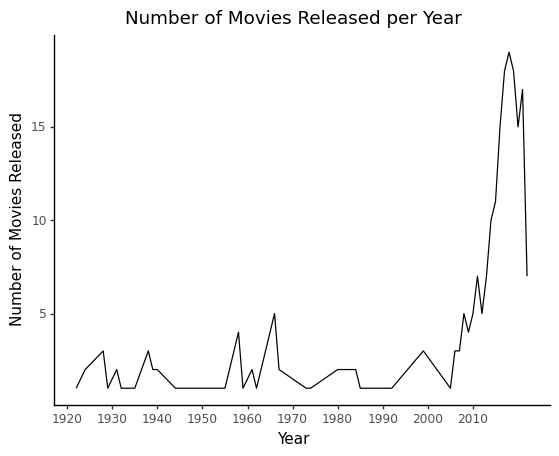

<ggplot: (118044376761)>

In [36]:
df_for_movies_to_year_chart = df3test["year"].sort_values()
df_for_movies_to_year_chart = pd.DataFrame(df_for_movies_to_year_chart.value_counts().sort_index())
df_for_movies_to_year_chart = df_for_movies_to_year_chart.reset_index()
df_for_movies_to_year_chart = df_for_movies_to_year_chart.rename(columns={"year":"number_of_movies","index":"year"})
df_for_movies_to_year_chart.loc[:,"year"] = df_for_movies_to_year_chart["year"].astype(int)

#learning lesson, .reset_index() resets the index to a column, creating a new column with the old index as values in the column


# change this to bar chart
( ggplot(df_for_movies_to_year_chart)  + 
 geom_line(aes(x="year", y="number_of_movies", group = 1)) + labs(title="Number of Movies Released per Year",x="Year",y="Number of Movies Released") + theme_classic() 
 + scale_x_continuous(breaks=range(1900,2020,10)))

# The below is test code. Ignore everything after this.

In [37]:
print error

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (3149485647.py, line 1)

In [ ]:

rotten_tomatoes_link = 'https://en.m.wikipedia.org/wiki/Evangelion:_3.0%2B1.0_Thrice_Upon_a_Time'
request = requests.get(rotten_tomatoes_link)
soup = BeautifulSoup(request.text)
test = soup.find_all('tr')

for row in test:
    label = row.find('th', {'class': 'infobox-label'})
    if label and label.text.strip() == 'Box office':
        revenue = row.find('td', {'class': 'infobox-data'}).text.strip()
        print('Box office revenue:', revenue)
        break

In [ ]:
# https://www.rottentomatoes.com/m/ugetsu
# https://www.rottentomatoes.com/m/2001_a_space_odyssey
# https://www.rottentomatoes.com/m/golem'
# https://www.rottentomatoes.com/m/the_last_laugh

rotten_tomatoes_link = 'https://www.rottentomatoes.com/m/the-cameraman-1928'
request = requests.get(rotten_tomatoes_link)
soup = BeautifulSoup(request.text)
score_stats = str(soup.find_all('score-board'))


indiv_genres = str(soup.find_all('li', class_='info-item')).split('genre"="')[1].split('">\n')[1].split('\n')[1].strip()
indiv_genres

x = (soup.find_all('li', class_='info-item'))

director_names = []
for item in x:
    label = item.find('b', class_='info-item-label')
    if label and label.text.strip() == 'Director:':
        director_links = item.find_all('a', href=True, attrs={'data-qa': 'movie-info-director'})
        for link in director_links:
            director_names.append(link.text)

print(director_names)

#another way to do it
producers = []
producer_spans = soup.find_all('span', class_='info-item-value')
for span in producer_spans:
    if 'Producer' in span.previous_sibling.previous_sibling.text:
        producer_links = span.find_all('a')
        for link in producer_links:
            producers.append(link.text)
print(producers)

writers = []
for item in x:
    label = item.find('b', class_='info-item-label')
    if label and label.text.strip() == 'Writer:':
        values = item.find_all('a')
        for v in values:
            writers.append(v.text)
print(writers)

runtime = ''
x = soup.find_all('li', {'class': 'info-item'})
for item in x:
    label = item.find('b', {'class': 'info-item-label'})
    if label is not None and label.text.strip() == 'Runtime:':
        runtime = item.find('time').text.strip()
        break
print(runtime)



#indiv_director_names

In [ ]:

temp_var = 1752
for indiv in reversed(data):

    if temp_var == 0:
        break
    url_general_page = 'https://en.m.wikipedia.org/wiki/List_of_films_with_a_100%25_rating_on_Rotten_Tomatoes'
    response = requests.get(url_general_page)
    soup = BeautifulSoup(response.text)

    link = 'https://en.m.wikipedia.org/' + soup.find_all('td')[temp_var].find('a')['href']
    temp_var -= 4
    if 'redlink' in link:
        link = None
    print (link)

In [ ]:
print abc

# END OF CODE FOR PROJECT WORK FOR MOVIES